In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [34]:
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [35]:
df.shape

(344, 7)

Data Visualization

Heatmap done near correlation matrix code

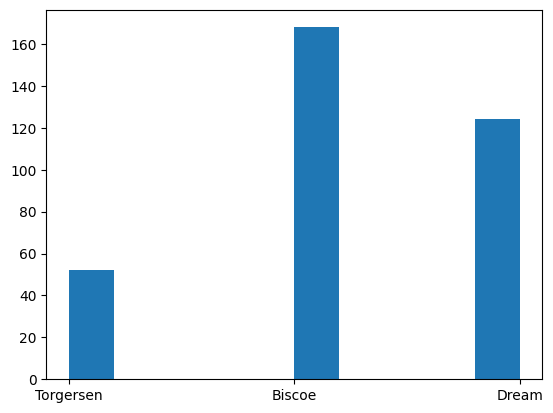

In [36]:
plt.hist(df['island'])
plt.show()

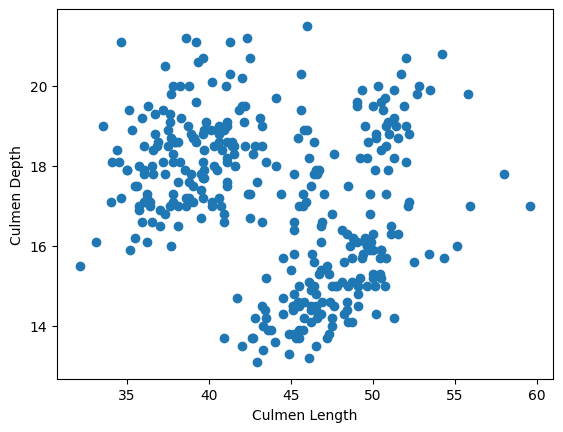

In [37]:
plt.scatter(df['culmen_length_mm'],df['culmen_depth_mm'])
plt.ylabel("Culmen Depth")
plt.xlabel("Culmen Length")
plt.show()

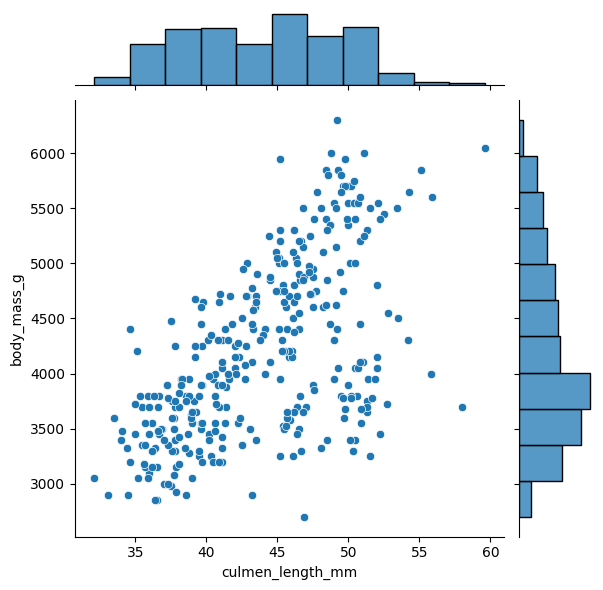

In [38]:
import seaborn as sns
sns.jointplot(x=df['culmen_length_mm'],y=df['body_mass_g'])
plt.show()

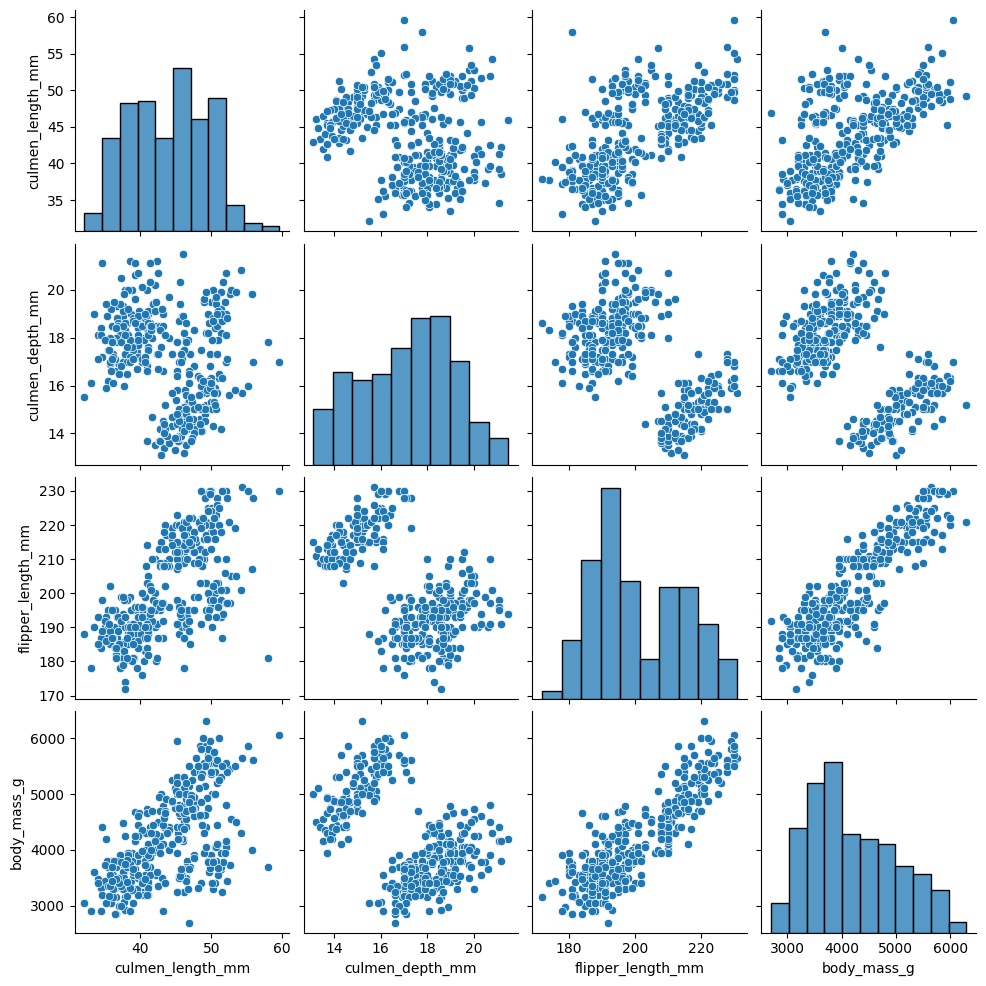

In [39]:
sns.pairplot(df)
plt.show()

Descriptive Analysis


In [40]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Checking and Handling Missing Values

In [41]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [42]:
df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [43]:
# For numerical columns we can fill the missing values with the average
df['culmen_depth_mm']=df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].mean())
df['culmen_length_mm']=df['culmen_length_mm'].fillna(df['culmen_length_mm'].mean())
df['flipper_length_mm']=df['flipper_length_mm'].fillna(df['flipper_length_mm'].mean())
df['body_mass_g']=df['body_mass_g'].fillna(df['body_mass_g'].mean())

In [44]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

In [45]:
#for categorical columns we can fill the null values with mode of the column
df['sex']=df['sex'].fillna(df['sex'].mode())

In [46]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      0
culmen_depth_mm       0
flipper_length_mm     0
body_mass_g           0
sex                  10
dtype: int64

Finding and replacing outliers

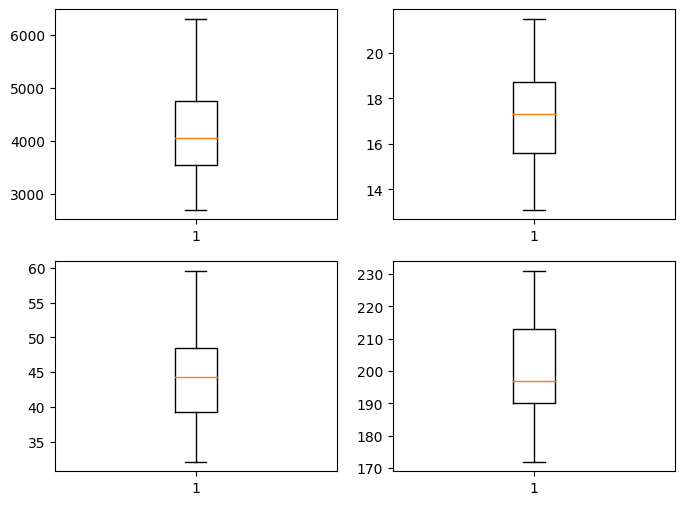

In [47]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8, 6))
ax[0,0].boxplot(df['body_mass_g'])
ax[0,1].boxplot(df['culmen_depth_mm'])
ax[1,0].boxplot(df['culmen_length_mm'])
ax[1,1].boxplot(df['flipper_length_mm'])
plt.show()

In [48]:
#there are no outliers in the numerical categories

Checking Correlation with Target Variable and performing encoding on categorical columns

In [49]:
#target variable is categorical hence we need to perform label encoding to include it in the corr matrix
#similarly we do it for the other categorical columns to include it in corr matrix
# we know sex, species and island are categorical columns
from sklearn import preprocessing
LB=preprocessing.LabelEncoder()
df['sex']=LB.fit_transform(df['sex'])
df['species']=LB.fit_transform(df['species'])
df['island']=LB.fit_transform(df['island'])

In [50]:
df.dtypes

species                int64
island                 int64
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                    int64
dtype: object

In [51]:
df.corr()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
species,1.000000,-0.635659,0.728674,-0.741335,0.851160,0.747726,-0.010379
island,-0.635659,1.000000,-0.351461,0.567506,-0.562328,-0.558045,0.043476
culmen_length_mm,0.728674,-0.351461,1.000000,-0.235053,0.656181,0.595110,0.264024
culmen_depth_mm,-0.741335,0.567506,-0.235053,1.000000,-0.583851,-0.471916,0.316379
flipper_length_mm,0.851160,-0.562328,0.656181,-0.583851,1.000000,0.871202,0.193476
body_mass_g,0.747726,-0.558045,0.595110,-0.471916,0.871202,1.000000,0.340402
sex,-0.010379,0.043476,0.264024,0.316379,0.193476,0.340402,1.000000


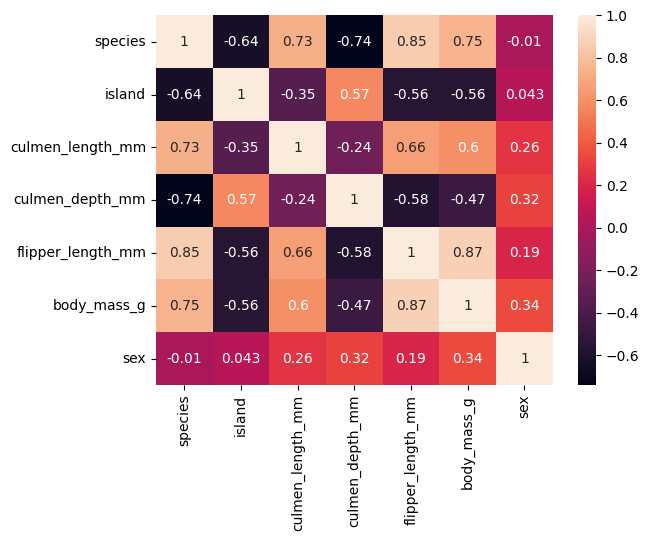

In [52]:
sns.heatmap(df.corr(),annot=True)
plt.show()

In [53]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10000,18.70000,181.000000,3750.000000,2
1,0,2,39.50000,17.40000,186.000000,3800.000000,1
2,0,2,40.30000,18.00000,195.000000,3250.000000,1
3,0,2,43.92193,17.15117,200.915205,4201.754386,3
4,0,2,36.70000,19.30000,193.000000,3450.000000,1


Splitting dependent and independent variables

In [54]:
dv=df.species  #dependent variable
iv=df.iloc[:,1:] #independent variables


In [55]:
iv.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,2
1,2,39.50000,17.40000,186.000000,3800.000000,1
2,2,40.30000,18.00000,195.000000,3250.000000,1
3,2,43.92193,17.15117,200.915205,4201.754386,3
4,2,36.70000,19.30000,193.000000,3450.000000,1


In [56]:
dv.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

Scaling the Independent variables

In [57]:
scaled_iv= (iv-iv.min())/(iv.max()-iv.min())
scaled_iv.head()

,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,1.0,0.254545,0.666667,0.152542,0.291667,0.666667
1,1.0,0.269091,0.511905,0.237288,0.305556,0.333333
2,1.0,0.298182,0.583333,0.389831,0.152778,0.333333
3,1.0,0.429888,0.482282,0.490088,0.417154,1.000000
4,1.0,0.167273,0.738095,0.355932,0.208333,0.333333


Splitting into training and testing and checking their sizes

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(scaled_iv,dv,test_size=0.2,random_state=42)

In [59]:
print("X train:",X_train.shape)
print("y train:",y_train.shape)
print("X test:",X_test.shape)
print("y test:",y_test.shape)

X train: (275, 6)
y train: (275,)
X test: (69, 6)
y test: (69,)
